In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

### Create a dataset to train linear model

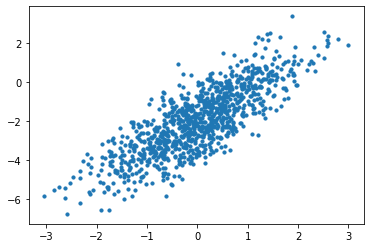

In [2]:
TRUE_W = 1.45
TRUE_b = -2
NUM_EXAMPLES = 1000
inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noises = tf.random.normal(shape=[NUM_EXAMPLES])
output = TRUE_W * inputs + TRUE_b + noises
plt.scatter(inputs, output, s=10)

### Linear model

In [3]:
class LinearModel:
    
    def __init__(self):
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(-4.0)
    
    def __call__(self, x):
        return self.W * x + self.b

### Loss function

In [4]:
def mse(y, y_hat):
    return tf.reduce_mean(tf.square(y_hat - y))

### Train function

In [5]:
def train(model, inputs, output, lr=1e-1):
    with tf.GradientTape() as tape:
        loss = mse(output, model(inputs))
    dW, db = tape.gradient(loss, [model.W, model.b])
    model.W.assign_sub(lr * dW)
    model.b.assign_sub(lr * db)
    return loss.numpy()

### Define model

In [6]:
model = LinearModel()

### Train

In [7]:
EPOCHS = 20
Ws = []
bs = []

for epoch in range(EPOCHS):
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    loss = train(model, inputs, output)
    template = 'Epoch {},\tloss {:.4f}'
    print(template.format(epoch+1, loss))

Epoch 1,	loss 17.0799
Epoch 2,	loss 11.5255
Epoch 3,	loss 7.8903
Epoch 4,	loss 5.5104
Epoch 5,	loss 3.9519
Epoch 6,	loss 2.9309
Epoch 7,	loss 2.2619
Epoch 8,	loss 1.8233
Epoch 9,	loss 1.5358
Epoch 10,	loss 1.3472
Epoch 11,	loss 1.2235
Epoch 12,	loss 1.1423
Epoch 13,	loss 1.0891
Epoch 14,	loss 1.0541
Epoch 15,	loss 1.0311
Epoch 16,	loss 1.0160
Epoch 17,	loss 1.0061
Epoch 18,	loss 0.9995
Epoch 19,	loss 0.9953
Epoch 20,	loss 0.9924


### Plot parameter updates

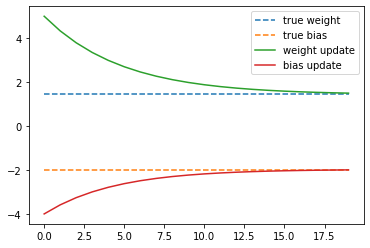

In [8]:
plt.plot(len(Ws)*[TRUE_W], '--', label='true weight')
plt.plot(len(Ws)*[TRUE_b], '--', label='true bias')
plt.plot(Ws, label='weight update')
plt.plot(bs, label='bias update')
plt.legend()
plt.show()